# Name: Gyana Priyadarshi (gyana.career@gmail.com)
## Assignment 1

##### Importing all important libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##### Read the csv file and assign it to a variable 

In [2]:
cars = pd.read_csv('Cars.csv')

##### Display shape of dataframe

In [3]:
print(cars.shape)

(398, 9)


##### Print all columns of dataframe

In [4]:
print(cars.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


##### Set the 'name' column as the index of dataframe

In [5]:
cars.set_index('name', inplace=True)

#####  Print a list of all the unique mpg values

In [6]:
unique_mpg_values = cars['mpg'].unique()
print(unique_mpg_values)

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


##### Create a column which contains the horsepower divided by weightas its metric and make this new column the index

In [7]:
cars.reset_index(inplace=True)
cars['hp_per_weight'] = cars['horsepower'] / cars['weight']
cars.set_index('hp_per_weight', inplace=True)
cars.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
hp_per_weight,,,,,,,,,
0.037100,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
0.044679,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
0.043655,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
0.043694,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
0.040591,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


---
# GRADED QUESTION'S ANSWERS
---

### 1. Name of car that has the highest horsepower

In [8]:
max_hp = cars[cars['horsepower'] == cars['horsepower'].max()]
car_name = max_hp.index[0] if cars.index.name == 'name' else max_hp['name'].values[0]
print(car_name) # pontiac grand prix

pontiac grand prix


### 2. Cars have mpg ≥ 35

In [9]:
count = cars[cars['mpg'] >= 35].shape[0]
print(count) # 36

36


### 3. Most common origin for cars with horsepower > 100 and weight < 3000

In [10]:
filtered_cars = cars[(cars['horsepower'] > 100) & (cars['weight'] < 3000)]
common_origin = filtered_cars['origin'].mode()[0]
print(common_origin) # usa

usa


### 4. Mean acceleration of cars from Japan (rounded to 2 decimals)

In [11]:
mean_acc_jp = cars[cars['origin'] == 'japan']['acceleration'].mean()
mean_acc_jp_2dp = round(mean_acc_jp, 2)
print(mean_acc_jp_2dp) # 16.17

16.17


### 5. Year that had the highest average mpg

In [12]:
avg_mpg_per_year = cars.groupby('model_year')['mpg'].mean()
year_highest_avg_mpg = avg_mpg_per_year.idxmax()
print(year_highest_avg_mpg) # 80

80


---
# UNGRADED EXTRA QUESTION'S ANSWERS
---

### Car with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [13]:
cars['hp_per_weight'] = cars['horsepower'] / cars['weight']
median_mpg = cars['mpg'].median()
above_median = cars[cars['mpg'] > median_mpg]
max_hp_per_weight = above_median['hp_per_weight'].max()
best_cars = above_median[above_median['hp_per_weight'] == max_hp_per_weight]
print(best_cars['name'])

hp_per_weight
0.050582    bmw 2002
Name: name, dtype: object


### A multi-line plot using Matplotlib that shows the evolution of average mpg over the years, separately for each origin

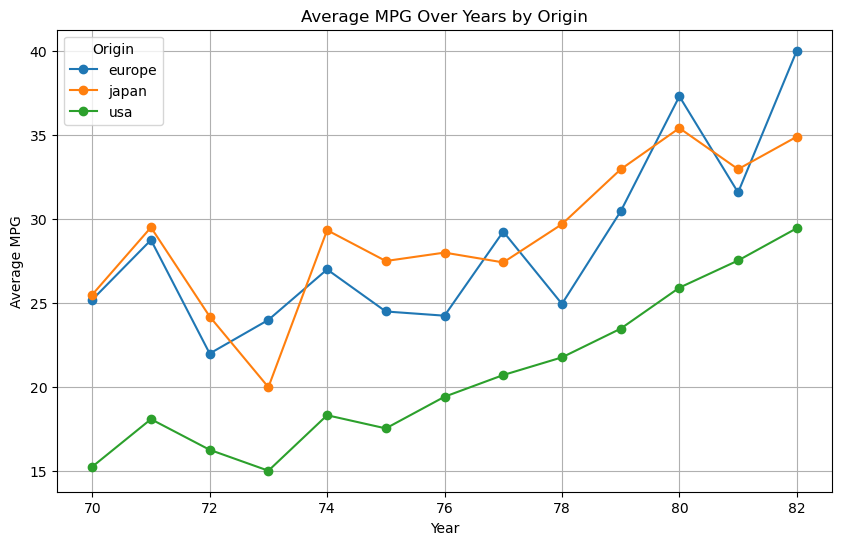

In [14]:
avg_mpg = cars.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()
plt.figure(figsize=(10,6))

for origin in avg_mpg['origin'].unique():
    subset = avg_mpg[avg_mpg['origin'] == origin]
    plt.plot(subset['model_year'], subset['mpg'], marker='o', label=origin)

plt.title('Average MPG Over Years by Origin')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.legend(title='Origin')
plt.grid(True)
plt.show()

### Tasks:
- Car names that appear in more than one model_year.
- For each such name, compute the standard deviation of mpg across years.
- Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.
- Report the model name(s), number of appearances, and the average mpg.
- Sort the result by number of appearances (descending), then mpg (descending).

In [15]:
grouped = cars.groupby('name').agg(
    model_years=('model_year', lambda x: x.nunique()),
    count=('name', 'count'),
    std_mpg=('mpg', 'std'),
    avg_mpg=('mpg', 'mean')
).reset_index()

consistent = grouped[
    (grouped['model_years'] >= 2) & 
    (grouped['std_mpg'] < 1.0)
]

consistent_sorted = consistent.sort_values(
    by=['count', 'avg_mpg'], 
    ascending=[False, False]
)
result = consistent_sorted[['name', 'count', 'avg_mpg']]
print(result)

                          name  count    avg_mpg
141           ford galaxie 500      3  14.333333
223          plymouth fury iii      3  14.333333
267        toyota corolla 1200      2  31.500000
175                  mazda 626      2  31.450000
287          volkswagen rabbit      2  29.250000
95                datsun pl510      2  27.000000
260                  saab 99le      2  24.500000
276             toyota mark ii      2  19.500000
98                 dodge aspen      2  18.850000
49   chevrolet chevelle malibu      2  17.500000
11            amc matador (sw)      2  14.500000
143      ford gran torino (sw)      2  13.500000
148                   ford ltd      2  13.500000
